====================================================================================================================================

Prepared 
by
Chris S. Bennett

===============================================================================================================================

## Executive Summary

Project Summary
This project was undertaken as part of a data mining competition hosted on Kaggle’s website and is aimed at developing a "Blue Book" for a Bulldozers challenge, i.e. estimating statistical/machine-learning model(s) to predict the sale prices of used Buldozers. The contest is sponsored by Fast Iron, a company known for ‘creating enterprise data standards, cleaning data, and maintaining clean data’. Similar to Kelly’s Blue Book (www.kbb.com) which provides values on new and used automobiles, the purpose of the Blue Book competition is to develop a similar tool to help customers put a value on their equipment. Kaggle contestants are provided with the sales data from previous auctions to use in developing their submission.
I estimated a suite of competing machine-learning/statistical models to predict the sale prices of used buldozers, including Xgboost, Random Forest, Regularized Linear Regression, and Support Vector Machines. Notably, the Xgboost model proved to be the superior model in terms of performance. It is worth noting that the parsimonious model comprising features selected through the modeling process performed comparably( Rsquare of 74.93% versus 75.44%) well relative to the model with all features, including those with importance scores close to zero. The Random Forest model was the runner up model with an Rsquare of approx. 73%.
The project is organized around five sections:

- Section 1: Data Importation and Exploration
- Section 2: Feature Engineering
- Section 3: Feature Selection
- Section 4: Comparing the Performance of Machine-learning Models
- Section 5: Extension of Linear Regression Coefficients Model - Xgboost Model


## Section 1 : Data Importation and Exploration

#### 1.1 Importing key python libraries

In [1]:
# to handle datasets
import pandas as pd
import numpy as np


# for plotting
import matplotlib.pyplot as plt
% matplotlib inline

from matplotlib import pyplot

# for tree binarisation
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


# to build the models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

import xgboost as xgb

# to evaluate the models
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

import re

from pandas.tools.plotting import scatter_matrix
import seaborn as sns
sns.set_color_codes()
sns.set(font_scale=1.25)

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# feature scaling
from sklearn.preprocessing import StandardScaler


import xgboost as xgb

# to evaluate the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

pd.pandas.set_option('display.max_columns', None)
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

import warnings
warnings.filterwarnings('ignore')

#### 1.2 Loading and exploring the dataset

In [2]:
# loading the Training  dataset 1
data1 = pd.read_csv('Train.csv')


FileNotFoundError: File b'Train.csv' does not exist

In [72]:
# Examining the first 3 rows of the dataset
data.head(3)

,STATE,GEOSTR,DENSTR2,PRECALL,REPNUM,REPDEPTH,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,PSU,NATTMPTS,NRECSEL,NRECSTR,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,AGE,MARITAL,CHILDREN,EDUCA,EMPLOY1,INCOME2,WEIGHT2,HEIGHT3,CTYCODE1,ZIPCODE,SEX,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,USENOW3,ALCDAY5,FLSHTMY2,PNEUVAC3,SHINGLE2,SEATBELT,DRNKDRI2,BLDSTOOL,PDIABTST,PREDIAB1,ASBIRDUC,HTIN4,HTM4,WTKG3,BMI5,BMI5CAT,RFBMI5,CHLDCNT,SMOKER3,RFSMOK3,DRNKANY5,DROCDY3,RFBING5,DRNKDY4,DRNKMO4,RFDRHV4,RFDRMN4,RFDRWM4,FLSHOT6,PNEUMO2,RFSEAT2,RFSEAT3,RFBLDS2,RFBLDS3,HFOB3YR,FOBTFS,SSBSUGAR,SSBFRUT2,HEALTHCL1,LIFECHG,CNCSUMM,CNCINSTR,CDCPAID,CNCNOINS,HCVHEAR,HCVTEST,LASTHCVT,HCVINPTE,HCVINPTA,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,BRTHCNTL3,TYPCNTRL2,NOBCUSE2,PFCHLDFT,PRNTLVIT,REGION
0,New York,201,D,To be called,40136,28,April,4252014,4,25,2014,1200,2014000012,2014000012,2,16600,14358760.86,Missing,Missing,NaN,Missing,NaN,NaN,Very good,None,None,Not asked or Missing,Yes,No,Number of hours [1-24],Dont know/Not sure,No,No,No,Not asked or Missing,No,No,Yes,Yes,No,No,No,Age 65 or older,Divorced,Number of children,College 1 year to 3 years (Some college or tec...,Retired,Dont know/Not sure,D,D,NaN,DSU,Male,Not asked or Missing,Yes,No,No,No,Yes,No,No,Not at all,No drinks in past 30 days,Not asked or Missing,No,No,Always,Not asked or Missing,Yes,Not asked or Missing,Not asked or Missing,Not asked or Missing,D,D,D,1 or greater,Overweight,Yes,One child in household,Former smoker,No,No,No Drink-Occasions per day,No,Did not drink,Did not drink in the past month,No,No,Respondent is male,No,No,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,No,Hve not had a blood stool test in the past year,Did not receive a home FOBT within the past 3 ...,Did not receive a sigmoidoscopy within the pas...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,NYS exclusive of NYC
1,New York,202,D,To be called,10105,17,January,3162014,3,16,2014,1200,2014000013,2014000013,8,14544,13058665.94,Missing,Missing,NaN,Missing,NaN,NaN,Very good,None,None,Not asked or Missing,Yes,Yes,Number of hours [1-24],No,No,No,No,Not asked or Missing,No,No,No,No,No,Yes,No,Age 65 or older,Divorced,None,College 4 years or more (College graduate),Retired,Less than $50000 ($35000 to less than $50000),D,D,NaN,DSU,Female,Not asked or Missing,No,No,No,No,No,No,No,Not at all,No drinks in past 30 days,Not asked or Missing,Yes,No,Always,Not asked or Missing,No,Not asked or Missing,Not asked or Missing,Not asked or Missing,D,D,D,1 or greater,Normal Weight,No,No children in household,Former smoker,No,No,No Drink-Occasions per day,No,Did not drink,Did not drink in the past month,No,Respondent is female,No,No,Yes,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,No,Hve not had a blood stool test in the past year,Did not receive a home FOBT within the past 3 ...,Did not receive a sigmoidoscopy within the pas...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,New York City (NYC)
2,New York,201,D,To be called,110014,4,November,11292014,November,29,2014,1200,2014000014,2014000014,8,16600,14358760.86,Missing,Missing,NaN,Missing,NaN,NaN,Good,Number of days

In [73]:
# Determining the dimensions of the data
data.shape

(6865, 120)

In [74]:
# Inspecting  the type of the variables
data.dtypes

STATE         object
GEOSTR         int64
DENSTR2       object
PRECALL       object
REPNUM         int64
REPDEPTH       int64
FMONTH        object
IDATE          int64
IMONTH        object
IDAY           int64
IYEAR          int64
DISPCODE       int64
SEQNO          int64
PSU            int64
NATTMPTS       int64
NRECSEL        int64
NRECSTR      float64
PVTRESD1      object
COLGHOUS      object
STATERES     float64
CELLFON3      object
LADULT       float64
NUMADULT     float64
GENHLTH       object
PHYSHLTH      object
MENTHLTH      object
POORHLTH      object
HLTHPLN1      object
EXERANY2      object
SLEPTIM1      object
              ...   
PNEUMO2       object
RFSEAT2       object
RFSEAT3       object
RFBLDS2       object
RFBLDS3       object
HFOB3YR       object
FOBTFS        object
SSBSUGAR      object
SSBFRUT2      object
HEALTHCL1     object
LIFECHG       object
CNCSUMM       object
CNCINSTR      object
CDCPAID       object
CNCNOINS      object
HCVHEAR       object
HCVTEST      

In [75]:
# Inspecting the categories of the outcome variable
data['DIABETE3'].unique()

array(['No', 'Yes', 'No pre-diabetes or borderline diabetes',
       'Yes but female told only during pregnancy',
       'Don\x92t know/Not Sure', 'Refused'], dtype=object)

In [76]:
# Exploring the distribution of the respondents among the categories of the outcome variable in absolute value
print(data['DIABETE3'].value_counts())

No                                           5848
Yes                                           842
No pre-diabetes or borderline diabetes        110
Yes but female told only during pregnancy      51
Dont know/Not Sure                             7
Refused                                         7
Name: DIABETE3, dtype: int64


In [77]:
# Examing the relative frequency distribution of respondents among the categories of the outcome variable
print(data['DIABETE3'].value_counts()/np.float(len(data)))

No                                           0.851857
Yes                                          0.122651
No pre-diabetes or borderline diabetes       0.016023
Yes but female told only during pregnancy    0.007429
Dont know/Not Sure                          0.001020
Refused                                      0.001020
Name: DIABETE3, dtype: float64


In [78]:
# Recoding the dependent variable as a binary variable
data['DIABETE3'] = np.where(data['DIABETE3'] == 'Yes',1,0 )

In [79]:
# Checking to see the convert worked
print(data['DIABETE3'].value_counts()/np.float(len(data)))

0    0.877349
1    0.122651
Name: DIABETE3, dtype: float64


#### 1.3 Oversampling the events - cases with self-reported diabetes

In [80]:
# Subsetting all the events
events = data[data.DIABETE3==1]

In [81]:

# Checking New Dataset
events.DIABETE3.unique()

array([1], dtype=int64)

In [82]:
# Assessing the dimensions of the events dataset
events.shape

(842, 120)

In [83]:
# Subsetting all the non-events
non_events = data[data.DIABETE3==0]

In [84]:
# Checking New Dataset for non-events
non_events.DIABETE3.unique()

array([0], dtype=int64)

In [85]:
# Assessing the dimensions of the non_events dataset
non_events.shape

(6023, 120)

In [86]:
# Taking a Random Sample of 842 observations from the non-events dataset
# you can use random_state for reproducibility
non_events1 =non_events.sample(n=842, random_state=2)

#### 1.4 Combining the events and non_events1 datasets

In [87]:

#Combining the events and non-events datasets
data = events.append(non_events1, ignore_index=True )

In [88]:
# Checking the the first 3 rows of new data set
data.head(3)

,STATE,GEOSTR,DENSTR2,PRECALL,REPNUM,REPDEPTH,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,PSU,NATTMPTS,NRECSEL,NRECSTR,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,AGE,MARITAL,CHILDREN,EDUCA,EMPLOY1,INCOME2,WEIGHT2,HEIGHT3,CTYCODE1,ZIPCODE,SEX,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,USENOW3,ALCDAY5,FLSHTMY2,PNEUVAC3,SHINGLE2,SEATBELT,DRNKDRI2,BLDSTOOL,PDIABTST,PREDIAB1,ASBIRDUC,HTIN4,HTM4,WTKG3,BMI5,BMI5CAT,RFBMI5,CHLDCNT,SMOKER3,RFSMOK3,DRNKANY5,DROCDY3,RFBING5,DRNKDY4,DRNKMO4,RFDRHV4,RFDRMN4,RFDRWM4,FLSHOT6,PNEUMO2,RFSEAT2,RFSEAT3,RFBLDS2,RFBLDS3,HFOB3YR,FOBTFS,SSBSUGAR,SSBFRUT2,HEALTHCL1,LIFECHG,CNCSUMM,CNCINSTR,CDCPAID,CNCNOINS,HCVHEAR,HCVTEST,LASTHCVT,HCVINPTE,HCVINPTA,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,BRTHCNTL3,TYPCNTRL2,NOBCUSE2,PFCHLDFT,PRNTLVIT,REGION
0,New York,202,D,To be called,100591,6,October,1262015,1,26,2015,1200,2014000030,2014000030,4,14544,13058665.94,Missing,Missing,NaN,Missing,NaN,NaN,Fair,None,None,Not asked or Missing,No,No,Number of hours [1-24],No,No,No,No,Not asked or Missing,No,No,No,No,No,No,1,Age 55 - 64,Married,Refused,Refused,Refused,Refused,D,D,NaN,DSU,Female,Not asked or Missing,Refused,Refused,Refused,Refused,Refused,Refused,Refused,Refused,Refused,Not asked or Missing,Refused,Refused,Refused,Refused,Refused,Not asked or Missing,Not asked or Missing,Not asked or Missing,D,D,D,Dont know/Refused/Missing,Dont know/Refused/Missing,Dont know/Refused/Missing,Dont know/Not sure/Missing,Never smoked,No,Refused/Missing,Dont know/Not Sure Or Refused/Missing,Dont know/Refused/Missing,Dont know/Not sure/Refused/Missing,Dont know/Refused/Missing,Dont know/Refused/Missing,Respondent is female,Dont know/Refused/Missing,Age Less Than 65,Age Less Than 65,Dont know/Not Sure Or Refused/Missing,Dont know/Not Sure Or Refused/Missing,Dont know/Not Sure/Refused,Missing Age less than 50 Age greater than 75,Missing or Age less than 50 or Age greater tha...,Missing or Age less than 50 or Age greater tha...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,New York City (NYC)
1,New York,202,D,To be called,50094,27,May,5272014,5,27,2014,1200,2014000093,2014000093,5,14544,13058665.94,Missing,Missing,NaN,Missing,NaN,NaN,Fair,Number of days,Number of days,Number of days,No,Yes,Number of hours [1-24],No,No,No,No,Not asked or Missing,No,No,No,Yes,No,No,1,Age 55 - 64,Divorced,None,College 1 year to 3 years (Some college or tec...,Unable to work,Less than $20000 ($15000 to less than $20000),D,D,NaN,DSU,Male,Not asked or Missing,No,No,No,Dont know/Not Sure,No,No,No,Not at all,No drinks in past 30 days,Dont know/Not Sure,No,No,Always,Not asked or Missing,No,Not asked or Missing,Not asked or Missing,Not asked or Missing,D,D,D,1 or greater,Overweight,Yes,No children in household,Former smoker,No,No,No Drink-Occasions per day,No,Did not drink,Did not drink in the past month,No,No,Respondent is male,Age Less Than 65,Age Less Than 65,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,No,Hve not had a blood stool test in the past year,Did not receive a home FOBT within the past 3 ...,Did not receive a sigmoidoscopy within the pas...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked o

In [89]:
# Assessing the dimensions of the new dataset
data.shape

(1684, 120)

In [90]:
# Checking for missingness
data.isnull().mean()

STATE        0.000000
GEOSTR       0.000000
DENSTR2      0.000000
PRECALL      0.000000
REPNUM       0.000000
REPDEPTH     0.000000
FMONTH       0.000000
IDATE        0.000000
IMONTH       0.000000
IDAY         0.000000
IYEAR        0.000000
DISPCODE     0.000000
SEQNO        0.000000
PSU          0.000000
NATTMPTS     0.000000
NRECSEL      0.000000
NRECSTR      0.000000
PVTRESD1     0.000000
COLGHOUS     0.000000
STATERES     0.253563
CELLFON3     0.000000
LADULT       1.000000
NUMADULT     0.253563
GENHLTH      0.000000
PHYSHLTH     0.000000
MENTHLTH     0.000000
POORHLTH     0.000000
HLTHPLN1     0.000000
EXERANY2     0.000000
SLEPTIM1     0.000000
               ...   
PNEUMO2      0.000000
RFSEAT2      0.000000
RFSEAT3      0.000000
RFBLDS2      0.000000
RFBLDS3      0.000000
HFOB3YR      0.000000
FOBTFS       0.000000
SSBSUGAR     0.000000
SSBFRUT2     0.000000
HEALTHCL1    0.000000
LIFECHG      0.000000
CNCSUMM      0.000000
CNCINSTR     0.000000
CDCPAID      0.000000
CNCNOINS  

In [91]:
# let's visualise the percentage of missing values in the dataset
for var in data.columns:
    if data[var].isnull().sum()>0:
        print(var, data[var].isnull().mean())

STATERES 0.253562945368
LADULT 1.0
NUMADULT 0.253562945368
CTYCODE1 1.0
LASTHCVT 0.880047505938
BRTHCNTL3 0.959619952494
TYPCNTRL2 0.982185273159
NOBCUSE2 0.983966745843
PRNTLVIT 0.96080760095


In [92]:

# let's inspect the type of those variables with a lot of missing information (over 40%) in the dataset
for var in data.columns:
    if data[var].isnull().mean()>0.4:
        print(var, data[var].unique())

LADULT [ nan]
CTYCODE1 [ nan]
LASTHCVT [nan "Don't know / Not sure" 'Unknown Month' 'Last Month and Year'
 'Refused']
BRTHCNTL3 [nan 'No' 'No partner' 'Yes' 'Refused']
TYPCNTRL2 [nan 'Male condoms' 'Birth control pills any kind'
 'Levonorgestrel(LNG) or hormonal IUD' 'Male sterilization (vasectomy)'
 'Female sterilization' 'Contraceptive patch' 'Withdrawal (or pulling out)']
NOBCUSE2 [nan 'You want a pregnancy' 'Your partner had a vasectomy (sterilization)'
 'You had a hysterectomy' 'You had tubes tied (sterilization)'
 'You just didnt think about it/dont care if you get pregnant'
 'Don\x92t think you or your partner can get pregnant (infertile or too old)'
 'Other reason' "Don't know / Not sure" 'Religious reasons'
 'You or your partner don\x92t like birth control/side effects' 'Refused']
PRNTLVIT [nan 'Every day of the week' '1 to 3 times a week' 'Refused'
 '0 times a week' '4 to 6 times a week']


In [93]:
# Deleting variables with a high percentage of missingness as well as those with constant values
data.drop(['STATE','PRECALL','HEIGHT3','WEIGHT2','HTIN4','HTM4','WTKG3','DENSTR2','REPNUM','REPDEPTH','FMONTH','IDATE','IMONTH','IDAY','IYEAR','SEQNO','PSU','NATTMPTS','NRECSEL','NRECSEL','NRECSTR','STATERES','ZIPCODE','LADULT','CTYCODE1','LASTHCVT','BRTHCNTL3','TYPCNTRL2','NOBCUSE2','PRNTLVIT'], axis=1,inplace=True)

In [94]:
# Checking dimensions of the new dataset after removing variables
data.shape

(1684, 91)

In [95]:
# Checking for missingness after change
data.isnull().mean()

GEOSTR       0.000000
DISPCODE     0.000000
PVTRESD1     0.000000
COLGHOUS     0.000000
CELLFON3     0.000000
NUMADULT     0.253563
GENHLTH      0.000000
PHYSHLTH     0.000000
MENTHLTH     0.000000
POORHLTH     0.000000
HLTHPLN1     0.000000
EXERANY2     0.000000
SLEPTIM1     0.000000
CVDINFR4     0.000000
CVDCRHD4     0.000000
CVDSTRK3     0.000000
ASTHMA3      0.000000
ASTHNOW      0.000000
CHCSCNCR     0.000000
CHCOCNCR     0.000000
CHCCOPD      0.000000
HAVARTH3     0.000000
ADDEPEV2     0.000000
CHCKIDNY     0.000000
DIABETE3     0.000000
AGE          0.000000
MARITAL      0.000000
CHILDREN     0.000000
EDUCA        0.000000
EMPLOY1      0.000000
               ...   
DRNKMO4      0.000000
RFDRHV4      0.000000
RFDRMN4      0.000000
RFDRWM4      0.000000
FLSHOT6      0.000000
PNEUMO2      0.000000
RFSEAT2      0.000000
RFSEAT3      0.000000
RFBLDS2      0.000000
RFBLDS3      0.000000
HFOB3YR      0.000000
FOBTFS       0.000000
SSBSUGAR     0.000000
SSBFRUT2     0.000000
HEALTHCL1 

In [96]:
# let's visualise the percentage of missing values in the dataset after change
for var in data.columns:
    if data[var].isnull().sum()>0:
        print(var, data[var].isnull().mean())

NUMADULT 0.253562945368


In [97]:
#Inspecting the first 2 rows of the data after change
data.head(2)

,GEOSTR,DISPCODE,PVTRESD1,COLGHOUS,CELLFON3,NUMADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,AGE,MARITAL,CHILDREN,EDUCA,EMPLOY1,INCOME2,SEX,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,USENOW3,ALCDAY5,FLSHTMY2,PNEUVAC3,SHINGLE2,SEATBELT,DRNKDRI2,BLDSTOOL,PDIABTST,PREDIAB1,ASBIRDUC,BMI5,BMI5CAT,RFBMI5,CHLDCNT,SMOKER3,RFSMOK3,DRNKANY5,DROCDY3,RFBING5,DRNKDY4,DRNKMO4,RFDRHV4,RFDRMN4,RFDRWM4,FLSHOT6,PNEUMO2,RFSEAT2,RFSEAT3,RFBLDS2,RFBLDS3,HFOB3YR,FOBTFS,SSBSUGAR,SSBFRUT2,HEALTHCL1,LIFECHG,CNCSUMM,CNCINSTR,CDCPAID,CNCNOINS,HCVHEAR,HCVTEST,HCVINPTE,HCVINPTA,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,PFCHLDFT,REGION
0,202,1200,Missing,Missing,Missing,NaN,Fair,None,None,Not asked or Missing,No,No,Number of hours [1-24],No,No,No,No,Not asked or Missing,No,No,No,No,No,No,1,Age 55 - 64,Married,Refused,Refused,Refused,Refused,Female,Not asked or Missing,Refused,Refused,Refused,Refused,Refused,Refused,Refused,Refused,Refused,Not asked or Missing,Refused,Refused,Refused,Refused,Refused,Not asked or Missing,Not asked or Missing,Not asked or Missing,Dont know/Refused/Missing,Dont know/Refused/Missing,Dont know/Refused/Missing,Dont know/Not sure/Missing,Never smoked,No,Refused/Missing,Dont know/Not Sure Or Refused/Missing,Dont know/Refused/Missing,Dont know/Not sure/Refused/Missing,Dont know/Refused/Missing,Dont know/Refused/Missing,Respondent is female,Dont know/Refused/Missing,Age Less Than 65,Age Less Than 65,Dont know/Not Sure Or Refused/Missing,Dont know/Not Sure Or Refused/Missing,Dont know/Not Sure/Refused,Missing Age less than 50 Age greater than 75,Missing or Age less than 50 or Age greater tha...,Missing or Age less than 50 or Age greater tha...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,New York City (NYC)
1,202,1200,Missing,Missing,Missing,NaN,Fair,Number of days,Number of days,Number of days,No,Yes,Number of hours [1-24],No,No,No,No,Not asked or Missing,No,No,No,Yes,No,No,1,Age 55 - 64,Divorced,None,College 1 year to 3 years (Some college or tec...,Unable to work,Less than $20000 ($15000 to less than $20000),Male,Not asked or Missing,No,No,No,Dont know/Not Sure,No,No,No,Not at all,No drinks in past 30 days,Dont know/Not Sure,No,No,Always,Not asked or Missing,No,Not asked or Missing,Not asked or Missing,Not asked or Missing,1 or greater,Overweight,Yes,No children in household,Former smoker,No,No,No Drink-Occasions per day,No,Did not drink,Did not drink in the past month,No,No,Respondent is male,Age Less Than 65,Age Less Than 65,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,No,Hve not had a blood stool test in the past year,Did not receive a home FOBT within the past 3 ...,Did not receive a sigmoidoscopy within the pas...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,New York City (NYC)


In [98]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 87 categorical variables


In [99]:
# find numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 4 numerical variables


In [100]:
# view of categorical variables
data[categorical].head(3)

,PVTRESD1,COLGHOUS,CELLFON3,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD,HAVARTH3,ADDEPEV2,CHCKIDNY,AGE,MARITAL,CHILDREN,EDUCA,EMPLOY1,INCOME2,SEX,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,USENOW3,ALCDAY5,FLSHTMY2,PNEUVAC3,SHINGLE2,SEATBELT,DRNKDRI2,BLDSTOOL,PDIABTST,PREDIAB1,ASBIRDUC,BMI5,BMI5CAT,RFBMI5,CHLDCNT,SMOKER3,RFSMOK3,DRNKANY5,DROCDY3,RFBING5,DRNKDY4,DRNKMO4,RFDRHV4,RFDRMN4,RFDRWM4,FLSHOT6,PNEUMO2,RFSEAT2,RFSEAT3,RFBLDS2,RFBLDS3,HFOB3YR,FOBTFS,SSBSUGAR,SSBFRUT2,HEALTHCL1,LIFECHG,CNCSUMM,CNCINSTR,CDCPAID,CNCNOINS,HCVHEAR,HCVTEST,HCVINPTE,HCVINPTA,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,PFCHLDFT,REGION
0,Missing,Missing,Missing,Fair,None,None,Not asked or Missing,No,No,Number of hours [1-24],No,No,No,No,Not asked or Missing,No,No,No,No,No,No,Age 55 - 64,Married,Refused,Refused,Refused,Refused,Female,Not asked or Missing,Refused,Refused,Refused,Refused,Refused,Refused,Refused,Refused,Refused,Not asked or Missing,Refused,Refused,Refused,Refused,Refused,Not asked or Missing,Not asked or Missing,Not asked or Missing,Dont know/Refused/Missing,Dont know/Refused/Missing,Dont know/Refused/Missing,Dont know/Not sure/Missing,Never smoked,No,Refused/Missing,Dont know/Not Sure Or Refused/Missing,Dont know/Refused/Missing,Dont know/Not sure/Refused/Missing,Dont know/Refused/Missing,Dont know/Refused/Missing,Respondent is female,Dont know/Refused/Missing,Age Less Than 65,Age Less Than 65,Dont know/Not Sure Or Refused/Missing,Dont know/Not Sure Or Refused/Missing,Dont know/Not Sure/Refused,Missing Age less than 50 Age greater than 75,Missing or Age less than 50 or Age greater tha...,Missing or Age less than 50 or Age greater tha...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,New York City (NYC)
1,Missing,Missing,Missing,Fair,Number of days,Number of days,Number of days,No,Yes,Number of hours [1-24],No,No,No,No,Not asked or Missing,No,No,No,Yes,No,No,Age 55 - 64,Divorced,None,College 1 year to 3 years (Some college or tec...,Unable to work,Less than $20000 ($15000 to less than $20000),Male,Not asked or Missing,No,No,No,Dont know/Not Sure,No,No,No,Not at all,No drinks in past 30 days,Dont know/Not Sure,No,No,Always,Not asked or Missing,No,Not asked or Missing,Not asked or Missing,Not asked or Missing,1 or greater,Overweight,Yes,No children in household,Former smoker,No,No,No Drink-Occasions per day,No,Did not drink,Did not drink in the past month,No,No,Respondent is male,Age Less Than 65,Age Less Than 65,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,No,Hve not had a blood stool test in the past year,Did not receive a home FOBT within the past 3 ...,Did not receive a sigmoidoscopy within the pas...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,New York City (NYC)
2,Missing,Missing,Missing,Very good,None,None,Not asked or Missing,Yes,Yes,Number of hours [1-24],No,No,No,No,Not asked or Missing,No,No,No,No,No,No,Age 65 or older,Divorced,None,College 4 years or more (College graduate),Retired,Less than $75000 ($50000 to less than $75000),Male,Not asked or Missing,No,No,No,No,No,No,No,Not at all,Days in past 30 days,Month / Year,No,Yes,Always,None,No,Not asked or Missing,Not asked or Missing,Not asked or Missing,1 or greater,Obese,Yes,No children in household,Never smoked,No,Yes,Drink-Occasions 

In [101]:
# view of numerical variables
data[numerical].head(3)

,GEOSTR,DISPCODE,NUMADULT,DIABETE3
0,202,1200,NaN,1
1,202,1200,NaN,1
2,201,1200,NaN,1


- 3 discrete variables
- 1 Binary variable

In [102]:
# let's visualise the values of the discrete variables
for var in ['GEOSTR',  'DISPCODE', 'NUMADULT']:
    print(var, ' values: ', data[var].unique())

GEOSTR  values:  [202 201 101 102]
DISPCODE  values:  [1200 1100]
NUMADULT  values:  [ nan   1.   2.   3.   4.   6.   5.   7.  17.]


In [103]:
numerical = [var for var in numerical if var not in['DIABETE3']]
numerical

['GEOSTR', 'DISPCODE', 'NUMADULT']

#### 1.5 Outliers

##### 1.51 Outliers in discrete variables

Let's calculate the percentage of respondents for each  of the values that can take the discrete variables in the dataset. I will call outliers, those values that are present in less than 1% of the respondents. This is exactly the same as finding rare labels in categorical variables. Discrete variables, in essence can be pre-processed / engineered as if they were categorical. Keep this in mind.

In [104]:
# outliers in discrete variables
for var in ['GEOSTR',  'DISPCODE', 'NUMADULT']:
    print(data[var].value_counts() / np.float(len(data)))
    print()

101    0.413302
102    0.333135
201    0.135986
202    0.117577
Name: GEOSTR, dtype: float64

1100    0.834323
1200    0.165677
Name: DISPCODE, dtype: float64

1.0     0.324822
2.0     0.313539
3.0     0.066508
4.0     0.030285
5.0     0.008907
6.0     0.001188
17.0    0.000594
7.0     0.000594
Name: NUMADULT, dtype: float64



**GEOSTR** does not contain outliers, as all its numbers are present in at least %14 of the respondents.

**DISPCODE**
This variable does not contain outliers, as all its numbers are present in at least %17 of the respondents.


**NUMADULT** 
This variable indicates the number of adults per household. We can see that values > 5 are rare (present in less than 1% of respondents). Thus I will cap this variable at 5 (top-coding).

##### 1.52 Number of labels: cardinality


In [105]:
# Examining the number of labels/categories per categorical variable
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

PVTRESD1  contains  2  labels
COLGHOUS  contains  1  labels
CELLFON3  contains  2  labels
GENHLTH  contains  7  labels
PHYSHLTH  contains  4  labels
MENTHLTH  contains  4  labels
POORHLTH  contains  5  labels
HLTHPLN1  contains  4  labels
EXERANY2  contains  4  labels
SLEPTIM1  contains  3  labels
CVDINFR4  contains  4  labels
CVDCRHD4  contains  4  labels
CVDSTRK3  contains  4  labels
ASTHMA3  contains  4  labels
ASTHNOW  contains  4  labels
CHCSCNCR  contains  4  labels
CHCOCNCR  contains  4  labels
CHCCOPD  contains  4  labels
HAVARTH3  contains  4  labels
ADDEPEV2  contains  4  labels
CHCKIDNY  contains  4  labels
AGE  contains  7  labels
MARITAL  contains  8  labels
CHILDREN  contains  4  labels
EDUCA  contains  8  labels
EMPLOY1  contains  10  labels
INCOME2  contains  11  labels
SEX  contains  2  labels
PREGNANT  contains  5  labels
QLACTLM2  contains  5  labels
USEEQUIP  contains  5  labels
BLIND  contains  4  labels
DECIDE  contains  5  labels
DIFFWALK  contains  5  labels
DIF

Most of the variables have cardinality greater than 2. 

##### 1.53 Outliers in Numerical variables

We will need to preprocess the numerical variable with outliers. Step to be undertaken is summarized below:
- NUMADULT: top-coding(5) 


#### 1.6 Separate train and test set

In [106]:
X_train, X_test, y_train, y_test = train_test_split(data, data.DIABETE3, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((1347, 91), (337, 91))

## Section 2 : Feature Engineering

#### 2.1 Engineering missing values in numerical variables

In [107]:
# print variables with missing data
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

NUMADULT 0.264291017075


- NUMADULT contains < 50% NA: create additional variable with NA + random sample imputation.
- Note: ** if variable contained > 50% NA: impute NA by value far in the distribution**

In [108]:
def impute_na(X_train, df, variable):
    # make temporary df copy
    temp = df.copy()
    
    # extract random from train set to fill the na
    random_sample = X_train[variable].dropna().sample(temp[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = temp[temp[variable].isnull()].index
    temp.loc[temp[variable].isnull(), variable] = random_sample
    return temp[variable]

In [109]:
# NUMADULT
# add variable indicating missingness
for df in [X_train, X_test]:
    for var in ['NUMADULT']:
        df[var+'_NA'] = np.where(df[var].isnull(), 1, 0)
    
# replace by random sampling
for df in [X_train, X_test]:
    for var in ['NUMADULT']:
        df[var] = impute_na(X_train, df, var)

In [110]:
# Checking if the change worked
# print variables with missing data
for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

#### 2.2 Outliers in Numerical variable

we treat missing value in the variable this way:
- NUMADULT: top-coding(5) 

In [111]:
# Defining functions to implement top-coding
def top_code(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])

for df in [X_train, X_test]:
    df['NUMADULT'] = top_code(df, 'NUMADULT', 5)
    

In [112]:
# let's check that it worked
for var in ['NUMADULT']:
    print(var, ' max value: ', X_train[var].max())

NUMADULT  max value:  5.0


#### 2.3 Engineering rare labels in categorical variables 

In [113]:
# find unfrequent labels in categorical variables
for var in categorical:
    print(var, X_train[var].value_counts()/np.float(len(X_train)))
    print()

PVTRESD1 Yes        0.735709
Missing    0.264291
Name: PVTRESD1, dtype: float64

COLGHOUS Missing    1.0
Name: COLGHOUS, dtype: float64

CELLFON3 Yes        0.735709
Missing    0.264291
Name: CELLFON3, dtype: float64

GENHLTH Good                   0.331106
Very good              0.269488
Fair                   0.175204
Excellent              0.121752
Poor                   0.092799
Refused                0.008909
Dont know/Not Sure    0.000742
Name: GENHLTH, dtype: float64

PHYSHLTH None                   0.553081
Number of days         0.411284
Refused                0.019302
Dont know/Not sure    0.016333
Name: PHYSHLTH, dtype: float64

MENTHLTH None                   0.631032
Number of days         0.337045
Refused                0.020045
Dont know/Not sure    0.011878
Name: MENTHLTH, dtype: float64

POORHLTH Not asked or Missing    0.418708
None                    0.294729
Number of days          0.269488
Refused                 0.009651
Dont know/Not sure     0.007424
Name: P

- Variables that contain rare labels : replace by most frequent category
- Variables that contain a lot of infrequent labels: replace by "rare" ( this prevents overfitting)


In [114]:
# Defining function to flag categorical label with low proportion of respondents as "rare"
def rare_imputation(variable, which='rare'):    
    # find frequent labels
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    frequent_cat = [x for x in temp.loc[temp>0.01].index.values]
    
    # create new variables, with Rare labels imputed
    if which=='frequent':
        # find the most frequent category
        mode_label = X_train.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
        X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], mode_label)
        X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], mode_label)
        
    else:
        X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'Rare')
        X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'Rare')
        

In [115]:
#Imputing "rare" for rare labels
for col in categorical:
    rare_imputation(col, 'rare')

In [116]:
#Imputing "frequent" for rare labels
for col in categorical:
    rare_imputation(col, 'frequent')

In [117]:
# let's check that it worked
for var in categorical:
    print(var, X_train[var].value_counts()/np.float(len(X_train)))
    print()

PVTRESD1 Yes        0.735709
Missing    0.264291
Name: PVTRESD1, dtype: float64

COLGHOUS Missing    1.0
Name: COLGHOUS, dtype: float64

CELLFON3 Yes        0.735709
Missing    0.264291
Name: CELLFON3, dtype: float64

GENHLTH Good         0.340757
Very good    0.269488
Fair         0.175204
Excellent    0.121752
Poor         0.092799
Name: GENHLTH, dtype: float64

PHYSHLTH None                   0.553081
Number of days         0.411284
Refused                0.019302
Dont know/Not sure    0.016333
Name: PHYSHLTH, dtype: float64

MENTHLTH None                   0.631032
Number of days         0.337045
Refused                0.020045
Dont know/Not sure    0.011878
Name: MENTHLTH, dtype: float64

POORHLTH Not asked or Missing    0.418708
None                    0.294729
Number of days          0.269488
Rare                    0.017075
Name: POORHLTH, dtype: float64

HLTHPLN1 Yes    0.925019
No     0.074981
Name: HLTHPLN1, dtype: float64

EXERANY2 Yes    0.706756
No     0.293244
Name: EX

In [118]:
# Changing the values of Income given as "Refused", "Don't Know/Not Sure" and "Not asked or Missing" to "Missing"
labels = ['Refused','Dont know/Not sure','Not asked or Missing']
X_train['INCOME2'] = np.where(X_train['INCOME2'].isin(labels),'Missing', X_train['INCOME2'])
X_test['INCOME2'] = np.where(X_test['INCOME2'].isin(labels),'Missing', X_test['INCOME2'])

In [119]:
# let's check that it worked
print(X_train['INCOME2'].value_counts()/np.float(len(X_train)))
print(X_test['INCOME2'].value_counts()/np.float(len(X_train)))

$75000 or more                                   0.222717
Missing                                          0.147736
Less than $75000 ($50000 to less than $75000)    0.123237
Less than $50000 ($35000 to less than $50000)    0.118782
Less than $20000 ($15000 to less than $20000)    0.088344
Less than $35000 ($25000 to less than $35000)    0.088344
Less than $25000 ($20000 to less than $25000)    0.087602
Less than $15000 ($10000 to less than $15000)    0.065330
Less than $10000                                 0.057906
Name: INCOME2, dtype: float64
$75000 or more                                   0.053452
Missing                                          0.034892
Less than $50000 ($35000 to less than $50000)    0.034892
Less than $75000 ($50000 to less than $75000)    0.028953
Less than $20000 ($15000 to less than $20000)    0.022272
Less than $35000 ($25000 to less than $35000)    0.020787
Less than $15000 ($10000 to less than $15000)    0.019302
Less than $25000 ($20000 to less than $250

#### 2.4 Encode categorical variables

- REGION and SEX: one hot encoding
- Remaining variables: replace by risk probability

In [120]:
# Defining function to implement the creation of dummy variables
for df in [X_train, X_test]:
    df['SEX']  = pd.get_dummies(df.SEX, drop_first=True)
    df['REGION']  = pd.get_dummies(df.REGION, drop_first=True)

In [121]:
X_train.SEX.unique(), X_train.REGION.unique()

(array([1, 0], dtype=uint64), array([0, 1], dtype=uint64))

In [122]:
X_test.SEX.unique(), X_test.REGION.unique()

(array([1, 0], dtype=uint64), array([0, 1], dtype=uint64))

In [123]:
# Defining function to implement recoding of categorical lables with their respective probability of the outcome variable
def encode_categorical_variables(var, target):
        # make label to risk dictionary
        ordered_labels = X_train.groupby([var])[target].mean().to_dict()
        
        # encode variables
        X_train[var] = X_train[var].map(ordered_labels)
        X_test[var] = X_test[var].map(ordered_labels)
        


In [124]:
# Encode labels in categorical vars
categorical = [var for var in categorical if var not in['SEX','REGION']]
for col in categorical:
    encode_categorical_variables(col, 'DIABETE3')

In [125]:
#let's inspect the Training dataset
X_train.head()

,GEOSTR,DISPCODE,PVTRESD1,COLGHOUS,CELLFON3,NUMADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,AGE,MARITAL,CHILDREN,EDUCA,EMPLOY1,INCOME2,SEX,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,USENOW3,ALCDAY5,FLSHTMY2,PNEUVAC3,SHINGLE2,SEATBELT,DRNKDRI2,BLDSTOOL,PDIABTST,PREDIAB1,ASBIRDUC,BMI5,BMI5CAT,RFBMI5,CHLDCNT,SMOKER3,RFSMOK3,DRNKANY5,DROCDY3,RFBING5,DRNKDY4,DRNKMO4,RFDRHV4,RFDRMN4,RFDRWM4,FLSHOT6,PNEUMO2,RFSEAT2,RFSEAT3,RFBLDS2,RFBLDS3,HFOB3YR,FOBTFS,SSBSUGAR,SSBFRUT2,HEALTHCL1,LIFECHG,CNCSUMM,CNCINSTR,CDCPAID,CNCNOINS,HCVHEAR,HCVTEST,HCVINPTE,HCVINPTA,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,PFCHLDFT,REGION,NUMADULT_NA
45,101,1100,0.547931,0.498144,0.547931,1.0,0.303030,0.406711,0.488235,0.427305,0.508828,0.440126,0.493967,0.464984,0.468647,0.480408,0.474934,0.475941,0.655172,0.658385,0.469810,0.374843,0.468240,0.838710,1,0.643527,0.671958,0.539823,0.541528,0.645233,0.487952,1,0.536524,0.418345,0.791837,0.476431,0.484848,0.408949,0.4804,0.477798,0.50365,0.610606,0.592937,0.655617,0.604348,0.488930,0.587302,0.650350,0.640879,0.647683,0.485686,0.508091,0.703297,0.605536,0.541212,0.549261,0.494986,0.60916,0.611111,0.523894,0.611111,0.611111,0.511316,0.509363,0.507513,0.679054,0.678899,0.492295,0.489051,0.739496,0.569767,0.669725,0.437917,0.581994,0.559229,0.929412,0.865079,0.672727,0.671642,0.647059,0.630952,0.515564,0.513043,0.489796,0.498144,0.558140,0.493556,0.508146,0.508146,0.506934,0,0
775,201,1200,0.359551,0.498144,0.359551,2.0,0.724576,0.613718,0.513216,0.483627,0.508828,0.440126,0.493967,0.464984,0.468647,0.480408,0.474934,0.475941,0.487302,0.476391,0.746377,0.675725,0.468240,0.481712,1,0.643527,0.552381,0.539823,0.573333,0.645233,0.559322,1,0.536524,0.693095,0.433526,0.476431,0.484848,0.787302,0.4804,0.477798,0.50365,0.610606,0.425175,0.655617,0.666667,0.488930,0.587302,0.583471,0.640879,0.647683,0.485686,0.508091,0.703297,0.605536,0.541212,0.549261,0.494986,0.60916,0.611111,0.523894,0.611111,0.611111,0.511316,0.509363,0.507513,0.590909,0.678899,0.492295,0.489051,0.583893,0.569767,0.560144,0.573579,0.496203,0.494937,0.417559,0.496823,0.486486,0.486465,0.488114,0.489311,0.494282,0.496823,0.489796,0.498144,0.468683,0.493556,0.508146,0.508146,0.506934,0,1
379,101,1100,0.547931,0.498144,0.547931,2.0,0.568627,0.406711,0.488235,0.427305,0.508828,0.637975,0.493967,0.464984,0.468647,0.480408,0.623810,0.618421,0.487302,0.476391,0.746377,0.374843,0.468240,0.481712,1,0.643527,0.456559,0.539823,0.541528,0.645233,0.487500,1,0.536524,0.693095,0.433526,0.829787,0.484848,0.787302,0.4804,0.477798,0.50365,0.610606,0.510638,0.655617,0.604348,0.488930,0.587302,0.583471,0.640879,0.647683,0.485686,0.508091,0.286533,0.279133,0.541212,0.463097,0.494986,0.60916,0.611111,0.523894,0.611111,0.611111,0.511316,0.509363,0.507513,0.679054,0.678899,0.492295,0.489051,0.583893,0.419971,0.419971,0.437917,0.496203,0.494937,0.417559,0.496823,0.486486,0.486465,0.488114,0.489311,0.494282,0.496823,0.489796,0.498144,0.468683,0.493556,0.508146,0.508146,0.506934,0,0
61,101,1100,0.547931,0.498144,0.547931,1.0,0.724576,0.613718,0.513216,0.617080,0.508828,0.637975,0.493967,0.464984,0.468647,0.480408,0.623810,0.618421,0.487302,0.476391,0.469810,0.675725,0.632653,0.481712,1,0.607143,0.552381,0.539823,0.573333,0.737589,0.630252,0,0.536524,0.693095,0.791837,0.829787,0.628205,0.787302,0.4804,0.477798,0.50365,0.610606,0.592937,0.655617,0.604348,0.488930,0.587302,0.583471,0.640879,0.647683,0.485686,0.508091,0.703297,0.605536,0.541212,0.549261,0.494986,0.60916,0.611111,0.523894,0.611111,0.611111,0.511316,0.490642,0.512898,0.401752,0.401752,0.492295,0.489051,0.583893,0.569767,0.560144,0.573579,0.581994,0.559229,0.929412,0.865079,0.486486,0.486465,0.488114,0.489311,0.515564,0.506329,0.489796,0.498144,0.558140,0.493556,0.508146,0.508146,0.506934,0,0
853,101,1200,0.547931,0.498144,0.547931,2.0,0.140244,0.406711,0.488235,0.427305,0.50882

In [126]:
#let's inspect the Test dataset
X_test.head()

,GEOSTR,DISPCODE,PVTRESD1,COLGHOUS,CELLFON3,NUMADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,AGE,MARITAL,CHILDREN,EDUCA,EMPLOY1,INCOME2,SEX,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,USENOW3,ALCDAY5,FLSHTMY2,PNEUVAC3,SHINGLE2,SEATBELT,DRNKDRI2,BLDSTOOL,PDIABTST,PREDIAB1,ASBIRDUC,BMI5,BMI5CAT,RFBMI5,CHLDCNT,SMOKER3,RFSMOK3,DRNKANY5,DROCDY3,RFBING5,DRNKDY4,DRNKMO4,RFDRHV4,RFDRMN4,RFDRWM4,FLSHOT6,PNEUMO2,RFSEAT2,RFSEAT3,RFBLDS2,RFBLDS3,HFOB3YR,FOBTFS,SSBSUGAR,SSBFRUT2,HEALTHCL1,LIFECHG,CNCSUMM,CNCINSTR,CDCPAID,CNCNOINS,HCVHEAR,HCVTEST,HCVINPTE,HCVINPTA,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,PFCHLDFT,REGION,NUMADULT_NA
34,101,1100,0.547931,0.498144,0.547931,2.0,0.568627,0.613718,0.513216,0.617080,0.366337,0.637975,0.493967,0.840336,0.468647,0.480408,0.474934,0.475941,0.487302,0.476391,0.46981,0.374843,0.632653,0.481712,1,0.643527,0.456559,0.539823,0.554054,0.645233,0.630252,1,0.536524,0.418345,0.433526,0.476431,0.628205,0.787302,0.480400,0.477798,0.50365,0.610606,0.592937,0.655617,0.604348,0.488930,0.587302,0.583471,0.640879,0.647683,0.485686,0.508091,0.497573,0.605536,0.541212,0.556522,0.541176,0.60916,0.611111,0.523894,0.611111,0.611111,0.511316,0.509363,0.507513,0.679054,0.678899,0.492295,0.489051,0.583893,0.569767,0.560144,0.573579,0.581994,0.559229,0.615854,0.394009,0.486486,0.486465,0.488114,0.489311,0.515564,0.513043,0.572816,0.498144,0.468683,0.493556,0.508146,0.508146,0.506934,0,0
268,102,1100,0.547931,0.498144,0.547931,1.0,0.568627,0.406711,0.488235,0.427305,0.508828,0.440126,0.493967,0.464984,0.468647,0.480408,0.474934,0.475941,0.487302,0.476391,0.46981,0.374843,0.468240,0.481712,1,0.607143,0.417969,0.539823,0.384615,0.328736,0.487500,0,0.536524,0.418345,0.433526,0.476431,0.484848,0.408949,0.480400,0.477798,0.50365,0.610606,0.425175,0.369309,0.604348,0.488930,0.587302,0.583471,0.640879,0.647683,0.485686,0.508091,0.497573,0.605536,0.541212,0.549261,0.494986,0.60916,0.611111,0.523894,0.611111,0.611111,0.511316,0.490642,0.512898,0.401752,0.401752,0.492295,0.489051,0.583893,0.569767,0.560144,0.573579,0.581994,0.559229,0.615854,0.394009,0.486486,0.486465,0.488114,0.489311,0.515564,0.513043,0.489796,0.498144,0.468683,0.493556,0.508146,0.508146,0.506934,0,0
704,202,1100,0.359551,0.498144,0.359551,1.0,0.568627,0.613718,0.488235,0.617080,0.508828,0.440126,0.493967,0.464984,0.468647,0.480408,0.474934,0.475941,0.487302,0.476391,0.46981,0.675725,0.468240,0.481712,1,0.643527,0.629630,0.539823,0.554054,0.737589,0.693182,1,0.536524,0.693095,0.791837,0.829787,0.484848,0.787302,0.853333,0.689189,0.50365,0.610606,0.592937,0.655617,0.604348,0.633333,0.587302,0.650350,0.640879,0.647683,0.485686,0.508091,0.703297,0.605536,0.541212,0.463097,0.494986,0.60916,0.611111,0.523894,0.611111,0.611111,0.511316,0.509363,0.507513,0.679054,0.678899,0.492295,0.489051,0.739496,0.656250,0.669725,0.437917,0.496203,0.494937,0.929412,0.865079,0.486486,0.486465,0.488114,0.489311,0.515564,0.506329,0.489796,0.498144,0.650000,0.714286,0.508146,0.508146,0.506934,1,1
1177,101,1100,0.547931,0.498144,0.547931,1.0,0.568627,0.613718,0.488235,0.483627,0.508828,0.637975,0.493967,0.464984,0.468647,0.480408,0.623810,0.618421,0.487302,0.476391,0.46981,0.374843,0.468240,0.481712,0,0.431535,0.417969,0.539823,0.573333,0.328736,0.326667,1,0.536524,0.693095,0.433526,0.476431,0.484848,0.408949,0.480400,0.477798,0.50365,0.610606,0.425175,0.369309,0.285078,0.488930,0.587302,0.289474,0.000000,0.000000,0.485686,0.508091,0.703297,0.605536,0.541212,0.549261,0.494986,0.60916,0.611111,0.523894,0.611111,0.611111,0.511316,0.509363,0.507513,0.401752,0.401752,0.492295,0.489051,0.288546,0.419971,0.419971,0.437917,0.382609,0.559229,0.615854,0.394009,0.486486,0.486465,0.488114,0.489311,0.515564,0.506329,0.489796,0.498144,0.558140,0.493556,0.508146,0.508146,0.506934,0,0
1210,201,1100,0.359551,0.498144,0.359551,2.0,0.724576,0.461538,0.513216,0.617080,

In [127]:
# Examining the dimensions of the training and test data sets
X_train.shape, X_test.shape

((1347, 92), (337, 92))

In [128]:
# Change the row index for the Training and Test data sets
X_train.index = range(1347)
X_test.index = range(337)

In [130]:
# Checking is the changes worked
X_train.head()

,GEOSTR,DISPCODE,PVTRESD1,COLGHOUS,CELLFON3,NUMADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,AGE,MARITAL,CHILDREN,EDUCA,EMPLOY1,INCOME2,SEX,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,USENOW3,ALCDAY5,FLSHTMY2,PNEUVAC3,SHINGLE2,SEATBELT,DRNKDRI2,BLDSTOOL,PDIABTST,PREDIAB1,ASBIRDUC,BMI5,BMI5CAT,RFBMI5,CHLDCNT,SMOKER3,RFSMOK3,DRNKANY5,DROCDY3,RFBING5,DRNKDY4,DRNKMO4,RFDRHV4,RFDRMN4,RFDRWM4,FLSHOT6,PNEUMO2,RFSEAT2,RFSEAT3,RFBLDS2,RFBLDS3,HFOB3YR,FOBTFS,SSBSUGAR,SSBFRUT2,HEALTHCL1,LIFECHG,CNCSUMM,CNCINSTR,CDCPAID,CNCNOINS,HCVHEAR,HCVTEST,HCVINPTE,HCVINPTA,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,PFCHLDFT,REGION,NUMADULT_NA
0,101,1100,0.547931,0.498144,0.547931,1.0,0.303030,0.406711,0.488235,0.427305,0.508828,0.440126,0.493967,0.464984,0.468647,0.480408,0.474934,0.475941,0.655172,0.658385,0.469810,0.374843,0.468240,0.838710,1,0.643527,0.671958,0.539823,0.541528,0.645233,0.487952,1,0.536524,0.418345,0.791837,0.476431,0.484848,0.408949,0.4804,0.477798,0.50365,0.610606,0.592937,0.655617,0.604348,0.488930,0.587302,0.650350,0.640879,0.647683,0.485686,0.508091,0.703297,0.605536,0.541212,0.549261,0.494986,0.60916,0.611111,0.523894,0.611111,0.611111,0.511316,0.509363,0.507513,0.679054,0.678899,0.492295,0.489051,0.739496,0.569767,0.669725,0.437917,0.581994,0.559229,0.929412,0.865079,0.672727,0.671642,0.647059,0.630952,0.515564,0.513043,0.489796,0.498144,0.558140,0.493556,0.508146,0.508146,0.506934,0,0
1,201,1200,0.359551,0.498144,0.359551,2.0,0.724576,0.613718,0.513216,0.483627,0.508828,0.440126,0.493967,0.464984,0.468647,0.480408,0.474934,0.475941,0.487302,0.476391,0.746377,0.675725,0.468240,0.481712,1,0.643527,0.552381,0.539823,0.573333,0.645233,0.559322,1,0.536524,0.693095,0.433526,0.476431,0.484848,0.787302,0.4804,0.477798,0.50365,0.610606,0.425175,0.655617,0.666667,0.488930,0.587302,0.583471,0.640879,0.647683,0.485686,0.508091,0.703297,0.605536,0.541212,0.549261,0.494986,0.60916,0.611111,0.523894,0.611111,0.611111,0.511316,0.509363,0.507513,0.590909,0.678899,0.492295,0.489051,0.583893,0.569767,0.560144,0.573579,0.496203,0.494937,0.417559,0.496823,0.486486,0.486465,0.488114,0.489311,0.494282,0.496823,0.489796,0.498144,0.468683,0.493556,0.508146,0.508146,0.506934,0,1
2,101,1100,0.547931,0.498144,0.547931,2.0,0.568627,0.406711,0.488235,0.427305,0.508828,0.637975,0.493967,0.464984,0.468647,0.480408,0.623810,0.618421,0.487302,0.476391,0.746377,0.374843,0.468240,0.481712,1,0.643527,0.456559,0.539823,0.541528,0.645233,0.487500,1,0.536524,0.693095,0.433526,0.829787,0.484848,0.787302,0.4804,0.477798,0.50365,0.610606,0.510638,0.655617,0.604348,0.488930,0.587302,0.583471,0.640879,0.647683,0.485686,0.508091,0.286533,0.279133,0.541212,0.463097,0.494986,0.60916,0.611111,0.523894,0.611111,0.611111,0.511316,0.509363,0.507513,0.679054,0.678899,0.492295,0.489051,0.583893,0.419971,0.419971,0.437917,0.496203,0.494937,0.417559,0.496823,0.486486,0.486465,0.488114,0.489311,0.494282,0.496823,0.489796,0.498144,0.468683,0.493556,0.508146,0.508146,0.506934,0,0
3,101,1100,0.547931,0.498144,0.547931,1.0,0.724576,0.613718,0.513216,0.617080,0.508828,0.637975,0.493967,0.464984,0.468647,0.480408,0.623810,0.618421,0.487302,0.476391,0.469810,0.675725,0.632653,0.481712,1,0.607143,0.552381,0.539823,0.573333,0.737589,0.630252,0,0.536524,0.693095,0.791837,0.829787,0.628205,0.787302,0.4804,0.477798,0.50365,0.610606,0.592937,0.655617,0.604348,0.488930,0.587302,0.583471,0.640879,0.647683,0.485686,0.508091,0.703297,0.605536,0.541212,0.549261,0.494986,0.60916,0.611111,0.523894,0.611111,0.611111,0.511316,0.490642,0.512898,0.401752,0.401752,0.492295,0.489051,0.583893,0.569767,0.560144,0.573579,0.581994,0.559229,0.929412,0.865079,0.486486,0.486465,0.488114,0.489311,0.515564,0.506329,0.489796,0.498144,0.558140,0.493556,0.508146,0.508146,0.506934,0,0
4,101,1200,0.547931,0.498144,0.547931,2.0,0.140244,0.406711,0.488235,0.427305,0.508828,0.4401

In [131]:
X_test.head()

,GEOSTR,DISPCODE,PVTRESD1,COLGHOUS,CELLFON3,NUMADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,AGE,MARITAL,CHILDREN,EDUCA,EMPLOY1,INCOME2,SEX,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,USENOW3,ALCDAY5,FLSHTMY2,PNEUVAC3,SHINGLE2,SEATBELT,DRNKDRI2,BLDSTOOL,PDIABTST,PREDIAB1,ASBIRDUC,BMI5,BMI5CAT,RFBMI5,CHLDCNT,SMOKER3,RFSMOK3,DRNKANY5,DROCDY3,RFBING5,DRNKDY4,DRNKMO4,RFDRHV4,RFDRMN4,RFDRWM4,FLSHOT6,PNEUMO2,RFSEAT2,RFSEAT3,RFBLDS2,RFBLDS3,HFOB3YR,FOBTFS,SSBSUGAR,SSBFRUT2,HEALTHCL1,LIFECHG,CNCSUMM,CNCINSTR,CDCPAID,CNCNOINS,HCVHEAR,HCVTEST,HCVINPTE,HCVINPTA,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,PFCHLDFT,REGION,NUMADULT_NA
0,101,1100,0.547931,0.498144,0.547931,2.0,0.568627,0.613718,0.513216,0.617080,0.366337,0.637975,0.493967,0.840336,0.468647,0.480408,0.474934,0.475941,0.487302,0.476391,0.46981,0.374843,0.632653,0.481712,1,0.643527,0.456559,0.539823,0.554054,0.645233,0.630252,1,0.536524,0.418345,0.433526,0.476431,0.628205,0.787302,0.480400,0.477798,0.50365,0.610606,0.592937,0.655617,0.604348,0.488930,0.587302,0.583471,0.640879,0.647683,0.485686,0.508091,0.497573,0.605536,0.541212,0.556522,0.541176,0.60916,0.611111,0.523894,0.611111,0.611111,0.511316,0.509363,0.507513,0.679054,0.678899,0.492295,0.489051,0.583893,0.569767,0.560144,0.573579,0.581994,0.559229,0.615854,0.394009,0.486486,0.486465,0.488114,0.489311,0.515564,0.513043,0.572816,0.498144,0.468683,0.493556,0.508146,0.508146,0.506934,0,0
1,102,1100,0.547931,0.498144,0.547931,1.0,0.568627,0.406711,0.488235,0.427305,0.508828,0.440126,0.493967,0.464984,0.468647,0.480408,0.474934,0.475941,0.487302,0.476391,0.46981,0.374843,0.468240,0.481712,1,0.607143,0.417969,0.539823,0.384615,0.328736,0.487500,0,0.536524,0.418345,0.433526,0.476431,0.484848,0.408949,0.480400,0.477798,0.50365,0.610606,0.425175,0.369309,0.604348,0.488930,0.587302,0.583471,0.640879,0.647683,0.485686,0.508091,0.497573,0.605536,0.541212,0.549261,0.494986,0.60916,0.611111,0.523894,0.611111,0.611111,0.511316,0.490642,0.512898,0.401752,0.401752,0.492295,0.489051,0.583893,0.569767,0.560144,0.573579,0.581994,0.559229,0.615854,0.394009,0.486486,0.486465,0.488114,0.489311,0.515564,0.513043,0.489796,0.498144,0.468683,0.493556,0.508146,0.508146,0.506934,0,0
2,202,1100,0.359551,0.498144,0.359551,1.0,0.568627,0.613718,0.488235,0.617080,0.508828,0.440126,0.493967,0.464984,0.468647,0.480408,0.474934,0.475941,0.487302,0.476391,0.46981,0.675725,0.468240,0.481712,1,0.643527,0.629630,0.539823,0.554054,0.737589,0.693182,1,0.536524,0.693095,0.791837,0.829787,0.484848,0.787302,0.853333,0.689189,0.50365,0.610606,0.592937,0.655617,0.604348,0.633333,0.587302,0.650350,0.640879,0.647683,0.485686,0.508091,0.703297,0.605536,0.541212,0.463097,0.494986,0.60916,0.611111,0.523894,0.611111,0.611111,0.511316,0.509363,0.507513,0.679054,0.678899,0.492295,0.489051,0.739496,0.656250,0.669725,0.437917,0.496203,0.494937,0.929412,0.865079,0.486486,0.486465,0.488114,0.489311,0.515564,0.506329,0.489796,0.498144,0.650000,0.714286,0.508146,0.508146,0.506934,1,1
3,101,1100,0.547931,0.498144,0.547931,1.0,0.568627,0.613718,0.488235,0.483627,0.508828,0.637975,0.493967,0.464984,0.468647,0.480408,0.623810,0.618421,0.487302,0.476391,0.46981,0.374843,0.468240,0.481712,0,0.431535,0.417969,0.539823,0.573333,0.328736,0.326667,1,0.536524,0.693095,0.433526,0.476431,0.484848,0.408949,0.480400,0.477798,0.50365,0.610606,0.425175,0.369309,0.285078,0.488930,0.587302,0.289474,0.000000,0.000000,0.485686,0.508091,0.703297,0.605536,0.541212,0.549261,0.494986,0.60916,0.611111,0.523894,0.611111,0.611111,0.511316,0.509363,0.507513,0.401752,0.401752,0.492295,0.489051,0.288546,0.419971,0.419971,0.437917,0.382609,0.559229,0.615854,0.394009,0.486486,0.486465,0.488114,0.489311,0.515564,0.506329,0.489796,0.498144,0.558140,0.493556,0.508146,0.508146,0.506934,0,0
4,201,1100,0.359551,0.498144,0.359551,2.0,0.724576,0.461538,0.513216,0.617080,0.508828,0.

## Section 3 : Feature Selection

In [134]:
# Splitting the Training set in label and features
y_train = X_train['DIABETE3']
y_test = X_test['DIABETE3']

In [136]:
y_train.shape,y_test.shape

((1347,), (337,))

In [140]:
# Removing the label/outcome variable from the data sets
X_train.drop(labels=['DIABETE3'], inplace=True, axis=1)
X_test.drop(labels=['DIABETE3'], inplace=True, axis=1)


In [141]:
# Checking if the change worked
X_train.head(2)

,GEOSTR,DISPCODE,PVTRESD1,COLGHOUS,CELLFON3,NUMADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD,HAVARTH3,ADDEPEV2,CHCKIDNY,AGE,MARITAL,CHILDREN,EDUCA,EMPLOY1,INCOME2,SEX,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,USENOW3,ALCDAY5,FLSHTMY2,PNEUVAC3,SHINGLE2,SEATBELT,DRNKDRI2,BLDSTOOL,PDIABTST,PREDIAB1,ASBIRDUC,BMI5,BMI5CAT,RFBMI5,CHLDCNT,SMOKER3,RFSMOK3,DRNKANY5,DROCDY3,RFBING5,DRNKDY4,DRNKMO4,RFDRHV4,RFDRMN4,RFDRWM4,FLSHOT6,PNEUMO2,RFSEAT2,RFSEAT3,RFBLDS2,RFBLDS3,HFOB3YR,FOBTFS,SSBSUGAR,SSBFRUT2,HEALTHCL1,LIFECHG,CNCSUMM,CNCINSTR,CDCPAID,CNCNOINS,HCVHEAR,HCVTEST,HCVINPTE,HCVINPTA,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,PFCHLDFT,REGION,NUMADULT_NA
0,101,1100,0.547931,0.498144,0.547931,1.0,0.303030,0.406711,0.488235,0.427305,0.508828,0.440126,0.493967,0.464984,0.468647,0.480408,0.474934,0.475941,0.655172,0.658385,0.469810,0.374843,0.46824,0.838710,0.643527,0.671958,0.539823,0.541528,0.645233,0.487952,1,0.536524,0.418345,0.791837,0.476431,0.484848,0.408949,0.4804,0.477798,0.50365,0.610606,0.592937,0.655617,0.604348,0.48893,0.587302,0.650350,0.640879,0.647683,0.485686,0.508091,0.703297,0.605536,0.541212,0.549261,0.494986,0.60916,0.611111,0.523894,0.611111,0.611111,0.511316,0.509363,0.507513,0.679054,0.678899,0.492295,0.489051,0.739496,0.569767,0.669725,0.437917,0.581994,0.559229,0.929412,0.865079,0.672727,0.671642,0.647059,0.630952,0.515564,0.513043,0.489796,0.498144,0.558140,0.493556,0.508146,0.508146,0.506934,0,0
1,201,1200,0.359551,0.498144,0.359551,2.0,0.724576,0.613718,0.513216,0.483627,0.508828,0.440126,0.493967,0.464984,0.468647,0.480408,0.474934,0.475941,0.487302,0.476391,0.746377,0.675725,0.46824,0.481712,0.643527,0.552381,0.539823,0.573333,0.645233,0.559322,1,0.536524,0.693095,0.433526,0.476431,0.484848,0.787302,0.4804,0.477798,0.50365,0.610606,0.425175,0.655617,0.666667,0.48893,0.587302,0.583471,0.640879,0.647683,0.485686,0.508091,0.703297,0.605536,0.541212,0.549261,0.494986,0.60916,0.611111,0.523894,0.611111,0.611111,0.511316,0.509363,0.507513,0.590909,0.678899,0.492295,0.489051,0.583893,0.569767,0.560144,0.573579,0.496203,0.494937,0.417559,0.496823,0.486486,0.486465,0.488114,0.489311,0.494282,0.496823,0.489796,0.498144,0.468683,0.493556,0.508146,0.508146,0.506934,0,1


In [142]:
# Checking if the change worked
X_test.head(2)

,GEOSTR,DISPCODE,PVTRESD1,COLGHOUS,CELLFON3,NUMADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,EXERANY2,SLEPTIM1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD,HAVARTH3,ADDEPEV2,CHCKIDNY,AGE,MARITAL,CHILDREN,EDUCA,EMPLOY1,INCOME2,SEX,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,USENOW3,ALCDAY5,FLSHTMY2,PNEUVAC3,SHINGLE2,SEATBELT,DRNKDRI2,BLDSTOOL,PDIABTST,PREDIAB1,ASBIRDUC,BMI5,BMI5CAT,RFBMI5,CHLDCNT,SMOKER3,RFSMOK3,DRNKANY5,DROCDY3,RFBING5,DRNKDY4,DRNKMO4,RFDRHV4,RFDRMN4,RFDRWM4,FLSHOT6,PNEUMO2,RFSEAT2,RFSEAT3,RFBLDS2,RFBLDS3,HFOB3YR,FOBTFS,SSBSUGAR,SSBFRUT2,HEALTHCL1,LIFECHG,CNCSUMM,CNCINSTR,CDCPAID,CNCNOINS,HCVHEAR,HCVTEST,HCVINPTE,HCVINPTA,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,PFCHLDFT,REGION,NUMADULT_NA
0,101,1100,0.547931,0.498144,0.547931,2.0,0.568627,0.613718,0.513216,0.617080,0.366337,0.637975,0.493967,0.840336,0.468647,0.480408,0.474934,0.475941,0.487302,0.476391,0.46981,0.374843,0.632653,0.481712,0.643527,0.456559,0.539823,0.554054,0.645233,0.630252,1,0.536524,0.418345,0.433526,0.476431,0.628205,0.787302,0.4804,0.477798,0.50365,0.610606,0.592937,0.655617,0.604348,0.48893,0.587302,0.583471,0.640879,0.647683,0.485686,0.508091,0.497573,0.605536,0.541212,0.556522,0.541176,0.60916,0.611111,0.523894,0.611111,0.611111,0.511316,0.509363,0.507513,0.679054,0.678899,0.492295,0.489051,0.583893,0.569767,0.560144,0.573579,0.581994,0.559229,0.615854,0.394009,0.486486,0.486465,0.488114,0.489311,0.515564,0.513043,0.572816,0.498144,0.468683,0.493556,0.508146,0.508146,0.506934,0,0
1,102,1100,0.547931,0.498144,0.547931,1.0,0.568627,0.406711,0.488235,0.427305,0.508828,0.440126,0.493967,0.464984,0.468647,0.480408,0.474934,0.475941,0.487302,0.476391,0.46981,0.374843,0.468240,0.481712,0.607143,0.417969,0.539823,0.384615,0.328736,0.487500,0,0.536524,0.418345,0.433526,0.476431,0.484848,0.408949,0.4804,0.477798,0.50365,0.610606,0.425175,0.369309,0.604348,0.48893,0.587302,0.583471,0.640879,0.647683,0.485686,0.508091,0.497573,0.605536,0.541212,0.549261,0.494986,0.60916,0.611111,0.523894,0.611111,0.611111,0.511316,0.490642,0.512898,0.401752,0.401752,0.492295,0.489051,0.583893,0.569767,0.560144,0.573579,0.581994,0.559229,0.615854,0.394009,0.486486,0.486465,0.488114,0.489311,0.515564,0.513043,0.489796,0.498144,0.468683,0.493556,0.508146,0.508146,0.506934,0,0


In [143]:
# I keep a copy of the dataset with all the variables
# to measure the performance of machine learning models
# at the end of the notebook
 
X_train_original = X_train.copy()
X_test_original = X_test.copy()

#### 3.1 Remove constant features

In [144]:
# remove constant features
constant_features = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]
 
X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)
 
X_train.shape, X_test.shape

((1347, 91), (337, 91))

#### 3.2 Remove quasi-constant features

In [145]:
# remove quasi-constant features
sel = VarianceThreshold(
    threshold=0.01)  # 0.1 indicates 99% of observations approximately
 
sel.fit(X_train)  # fit finds the features with low variance
 
sum(sel.get_support()) # how many not quasi-constant?

35

In [146]:
features_to_keep = X_train.columns[sel.get_support()]

In [147]:
# we can then remove the features like this
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)
 
X_train.shape, X_test.shape

((1347, 35), (337, 35))

In [148]:
# sklearn transformations lead to numpy arrays
# here I transform the arrays back to dataframes
# please be mindful of getting the columns assigned
# correctly
 
X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep
 
X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

#### 3.3 Remove duplicated features

In [149]:
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)
 
    col_1 = X_train.columns[i]
 
    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20
30


1

In [150]:
# remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)
 
X_train.shape, X_test.shape

((1347, 34), (337, 34))

In [151]:
# I keep a copy of the dataset except constant and duplicated variables
# to measure the performance of machine learning models
# at the end of the notebook
 
X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

#### 3.4 Remove correlated features

In [152]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
 
corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  10


In [153]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)
 
X_train.shape, X_test.shape

((1347, 24), (337, 24))

In [154]:
# keep a copy of the dataset at  this stage
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

#### 3.5 Remove features using univariate ROC-AUC

In [155]:
# find important features using univariate roc-auc
 
# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set
 
roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

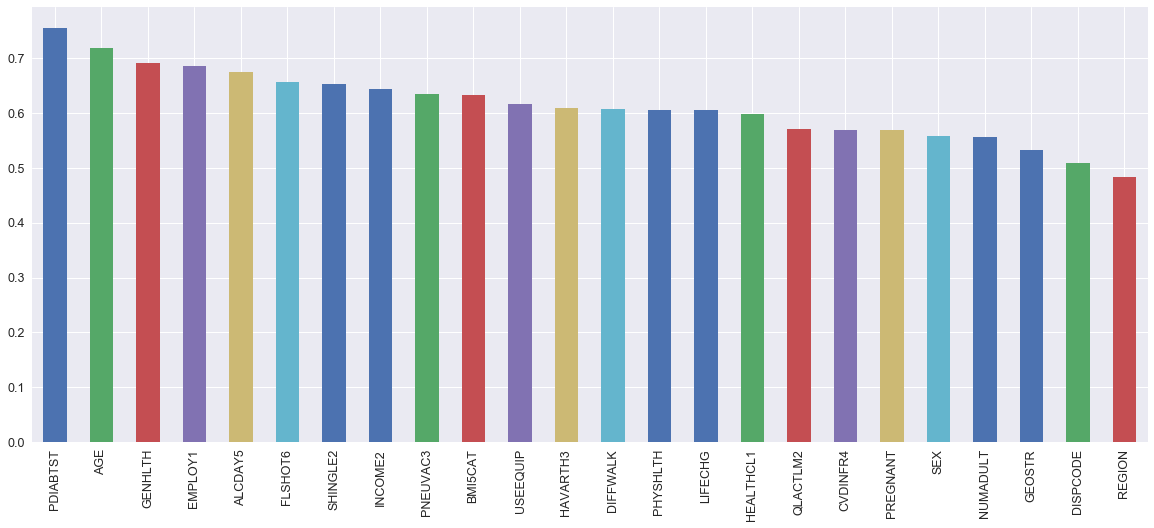

In [156]:
# let's add the variable names and order it for clearer visualisation
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [157]:
# by removing features with univariate roc_auc == 0.5
# we remove another 1 feature
 
selected_feat = roc_values[roc_values>0.5]
len(selected_feat), X_train.shape[1]

(23, 24)

#### 3.6 Select features by the regression coefficients

In [158]:
# Scaling features for the regression model
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [159]:
# select features using the coefficient of a non
# regularised logistic regression
 
sel_ = SelectFromModel(LogisticRegression(C=1000))
sel_.fit(scaler.transform(X_train), y_train)
 
# remove features with zero coefficient from dataset
# and parse again as dataframe (output of sklearn is
# numpy array)
X_train_coef = pd.DataFrame(sel_.transform(X_train))
X_test_coef = pd.DataFrame(sel_.transform(X_test))
 
# add the columns name
X_train_coef.columns = X_train.columns[(sel_.get_support())]
X_test_coef.columns = X_train.columns[(sel_.get_support())]

In [160]:
X_train_coef.shape, X_test_coef.shape

((1347, 5), (337, 5))

## Section 4 : Compare the performance in machine learning algorithms

In [161]:
# create a function to build random forests and compare performance in train and test set
 
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [162]:
# original data set
run_randomForests(X_train_original,
                  X_test_original,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9481565093166606
Test set
Random Forests roc-auc: 0.9359543436905516


In [163]:
# filter methods - basic
run_randomForests(X_train_basic_filter,
                  X_test_basic_filter,
                  y_train, y_test)


Train set
Random Forests roc-auc: 0.948368151394633
Test set
Random Forests roc-auc: 0.9347917987740436


In [164]:
# filter methods - correlation
run_randomForests(X_train_corr,
                  X_test_corr,
                  y_train, y_test)


Train set
Random Forests roc-auc: 0.9396136650235011
Test set
Random Forests roc-auc: 0.9186923131120975


In [165]:
# filter methods - univariate roc-auc
run_randomForests(X_train[selected_feat.index],
                  X_test_corr[selected_feat.index],
                  y_train, y_test)


Train set
Random Forests roc-auc: 0.9405263714847574
Test set
Random Forests roc-auc: 0.9218628901571196


In [166]:
# embedded methods - Logistic regression coefficients
run_randomForests(X_train_coef,
                  X_test_coef,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9422591909981569
Test set
Random Forests roc-auc: 0.9347565701402099


#### Note:
Selecting features using the logistic regression coefficients gives the best performance except for the model with features from the original model. However, keep in mind that the model with the original features uses 92 features vs the only 5 used by the coefficients selection method. This means that many of those 92 features are still redundant, and we could potentially reduce the feature space further without loosing performance significantly.

## Section 5 : Extension of Logistic regression coefficients Model - Xgboost Model

In [182]:
xgb_model = xgb.XGBClassifier()

eval_set = [(X_test_coef, y_test)]
xgb_model.fit(X_train_coef, y_train, eval_metric="auc", eval_set=eval_set, verbose=False)

pred = xgb_model.predict_proba(X_train_coef)
print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = xgb_model.predict_proba(X_test_coef)
print('xgb test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

xgb train roc-auc: 0.9482116244411327
xgb test roc-auc: 0.942806312971183


In [183]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred[:,1])


#### 5.1 Drawing ROC Curve - Xgboost Model

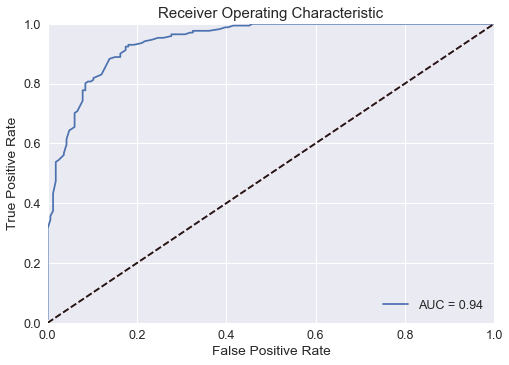

In [184]:
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 5.2 Confusion Matrix and Classification Report -  Xgboost model with features extracted with Logistic regression coefficients

In [185]:
# Making the Confusion Matrix - Logistic regression coefficients Model

print(confusion_matrix(y_test, pred[:,1].round()))
print(classification_report(y_test,pred[:,1].round()))

[[141  25]
 [ 19 152]]
             precision    recall  f1-score   support

          0       0.88      0.85      0.87       166
          1       0.86      0.89      0.87       171

avg / total       0.87      0.87      0.87       337



#### 5.3 Calculating Lift Score
Lift measures the degree to which the predictions of a classification model are better than randomly-generated predictions.

In [186]:
from mlxtend.evaluate import lift_score
lift_score(y_test, pred[:,1].round())

1.692404268675455

#### 5.4 K-Fold Validation - xgboost

In [191]:
# Applying k-Fold Cross Validation
scores = cross_val_score(estimator = xgb_model, X = X_test_coef, y = y_test, cv = 10, scoring='roc_auc')
print('mean roc-auc is: {}' .format(scores.mean()))
print('standard deviation of roc-auc is: {}' .format(scores.std()))

mean roc-auc is: 0.9405360918877357
standard deviation of roc-auc is: 0.0490477416520166


#### 5.5 Feature of importance

In [188]:
vars = X_test_coef.columns

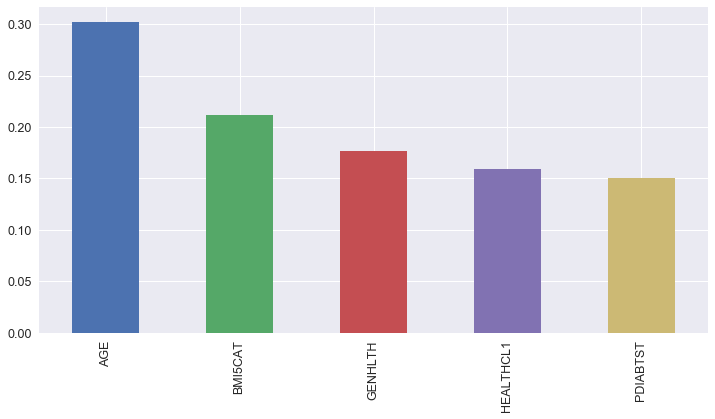

In [189]:
importance = pd.Series(xgb_model.feature_importances_)
importance.index = vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))

#### 5.6 Conclusion
The Xgboost model gives a slighly better predictive performance than the Random Forest model ( roc-auc = **93.48** vs roc-auc = **94.28**). Also, the Xgboost model yields an overall accuracy of **87%** with precision and recall of **86%** and **89% ** respectively. In addition, note that the Xgboost model has a lift of approx. 1.69, which means that the predictions of this classification is 1.69 times better than randomly-generated predictions. Also worthy of note is the fact that the roc-auc of the 10-fold validation model is approx. **94%** and the dimensionality of the dataset (i.e. the feature space) has been significantly reduced, from 120 features to 5 features.
Notably the 5 most important predictors of whether a person has diabetes or not in order of importance are given below :
1. AGE - Age of the respondent?
2. BMI5CAT - Computed body mass index categories?
3. GENHLTH - Would you say that in general your health is ?
4. HEALTHCL1 - (You said that a medical professional has told you that you have or have had a chronic illness. During the last 12   months, have you taken a course or class to teach you about how to manage problems related to (this/these) chronic illness(es)?
Have you ever attended a lifestyle change program, such as the diabetes Prevention Program, in order to improve your health or prevent diabetes?)
5. PDIABTST - Had a test for high blood sugar in past three years?
